In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sn

In [249]:
# Load the dataset
data = pd.read_csv("data/winequalityN.csv")
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [250]:
# Display dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [251]:
# Display statistical summary of the dataset

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [252]:
# Check for missing values in the dataset

data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

# Data distribution by column

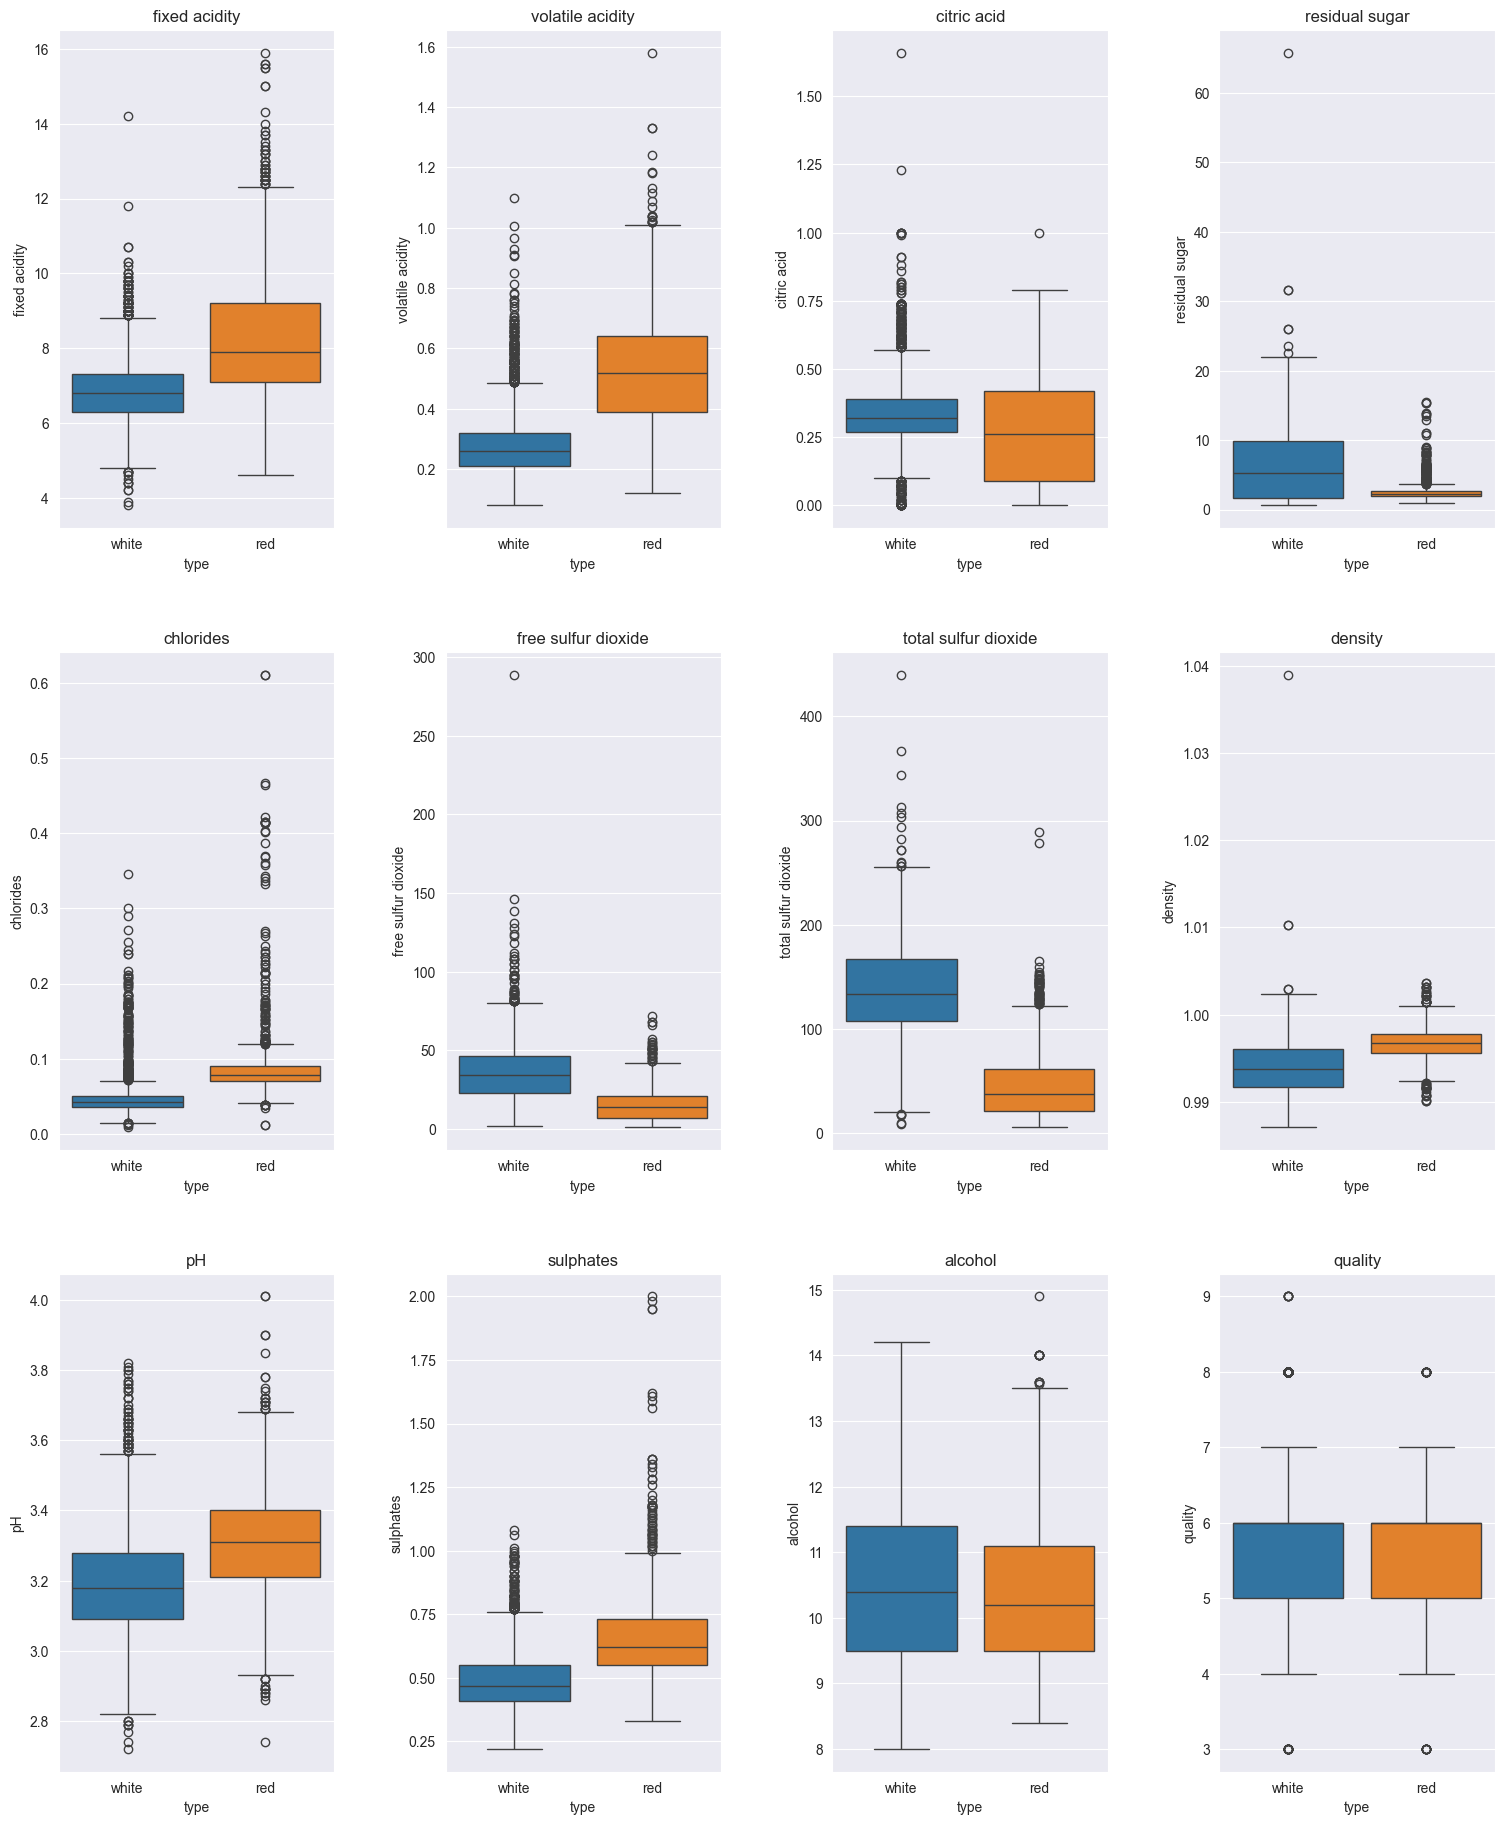

In [253]:
# Plot the distribution of data for each feature by wine type
col = data.drop('type',axis=1).columns

fig, ax = plt.subplots(3, 4, figsize=(10, 12))  # Create a 3x4 grid of subplots

for i in range(0, 12):
    row = i // 4
    col_idx = i % 4
    sn.boxplot(data=data, x='type', y=col[i], ax=ax[row, col_idx], hue='type')
    ax[row, col_idx].set_title(col[i])

plt.tight_layout()
plt.subplots_adjust(right=1.5, top=1.5)
plt.show()

# preprocessing - white

In [254]:
# Separate white wine data
white = data[data['type']=='white']
white = white.drop('type', axis=1)
white = white.reset_index()
print(white.isna().sum())

# Use columns without any missing values to predict missing values
non_nan_columns = white.loc[:, white.isna().sum() == 0].columns  # Columns without any missing values
nan_columns = white.loc[:, white.isna().sum() != 0].columns # Columns with missing values

drop_white = white.dropna()  # Clean data without missing values
drop_white_X = drop_white[non_nan_columns] 
for col in nan_columns: # For each column with missing values
    drop_white_y = drop_white[col] # Set the column as the target variable
    model = LinearRegression()
    model.fit(drop_white_X, drop_white_y)
    
    nan_idx = white.loc[white[col].isnull(), col].index    
    print(nan_idx)
    white.loc[white[col].isnull(), col]= model.predict(white[non_nan_columns].iloc[nan_idx, :])# Fill missing values

print(white.isna().sum())

white_X = white.drop('quality', axis=1)
white_y = white['quality']

# Scale the features
for col in white_X.columns:
    white_X[col] = StandardScaler().fit_transform(white_X[[col]])

# Split the data into training and testing sets
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_X,white_y,
                                                    test_size = 0.2,
                                                    random_state=1,
                                                    stratify=white_y) # Maintain class distribution


index                   0
fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
quality                 0
dtype: int64
Index([17, 174, 249, 267, 368, 518, 1079, 2902], dtype='int64')
Index([86, 521, 621, 812, 1079, 2894, 4895], dtype='int64')
Index([268, 909], dtype='int64')
Index([33, 438], dtype='int64')
Index([98, 747], dtype='int64')
Index([54, 139, 440, 587, 697, 972, 4892], dtype='int64')
Index([224, 2902], dtype='int64')
index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 

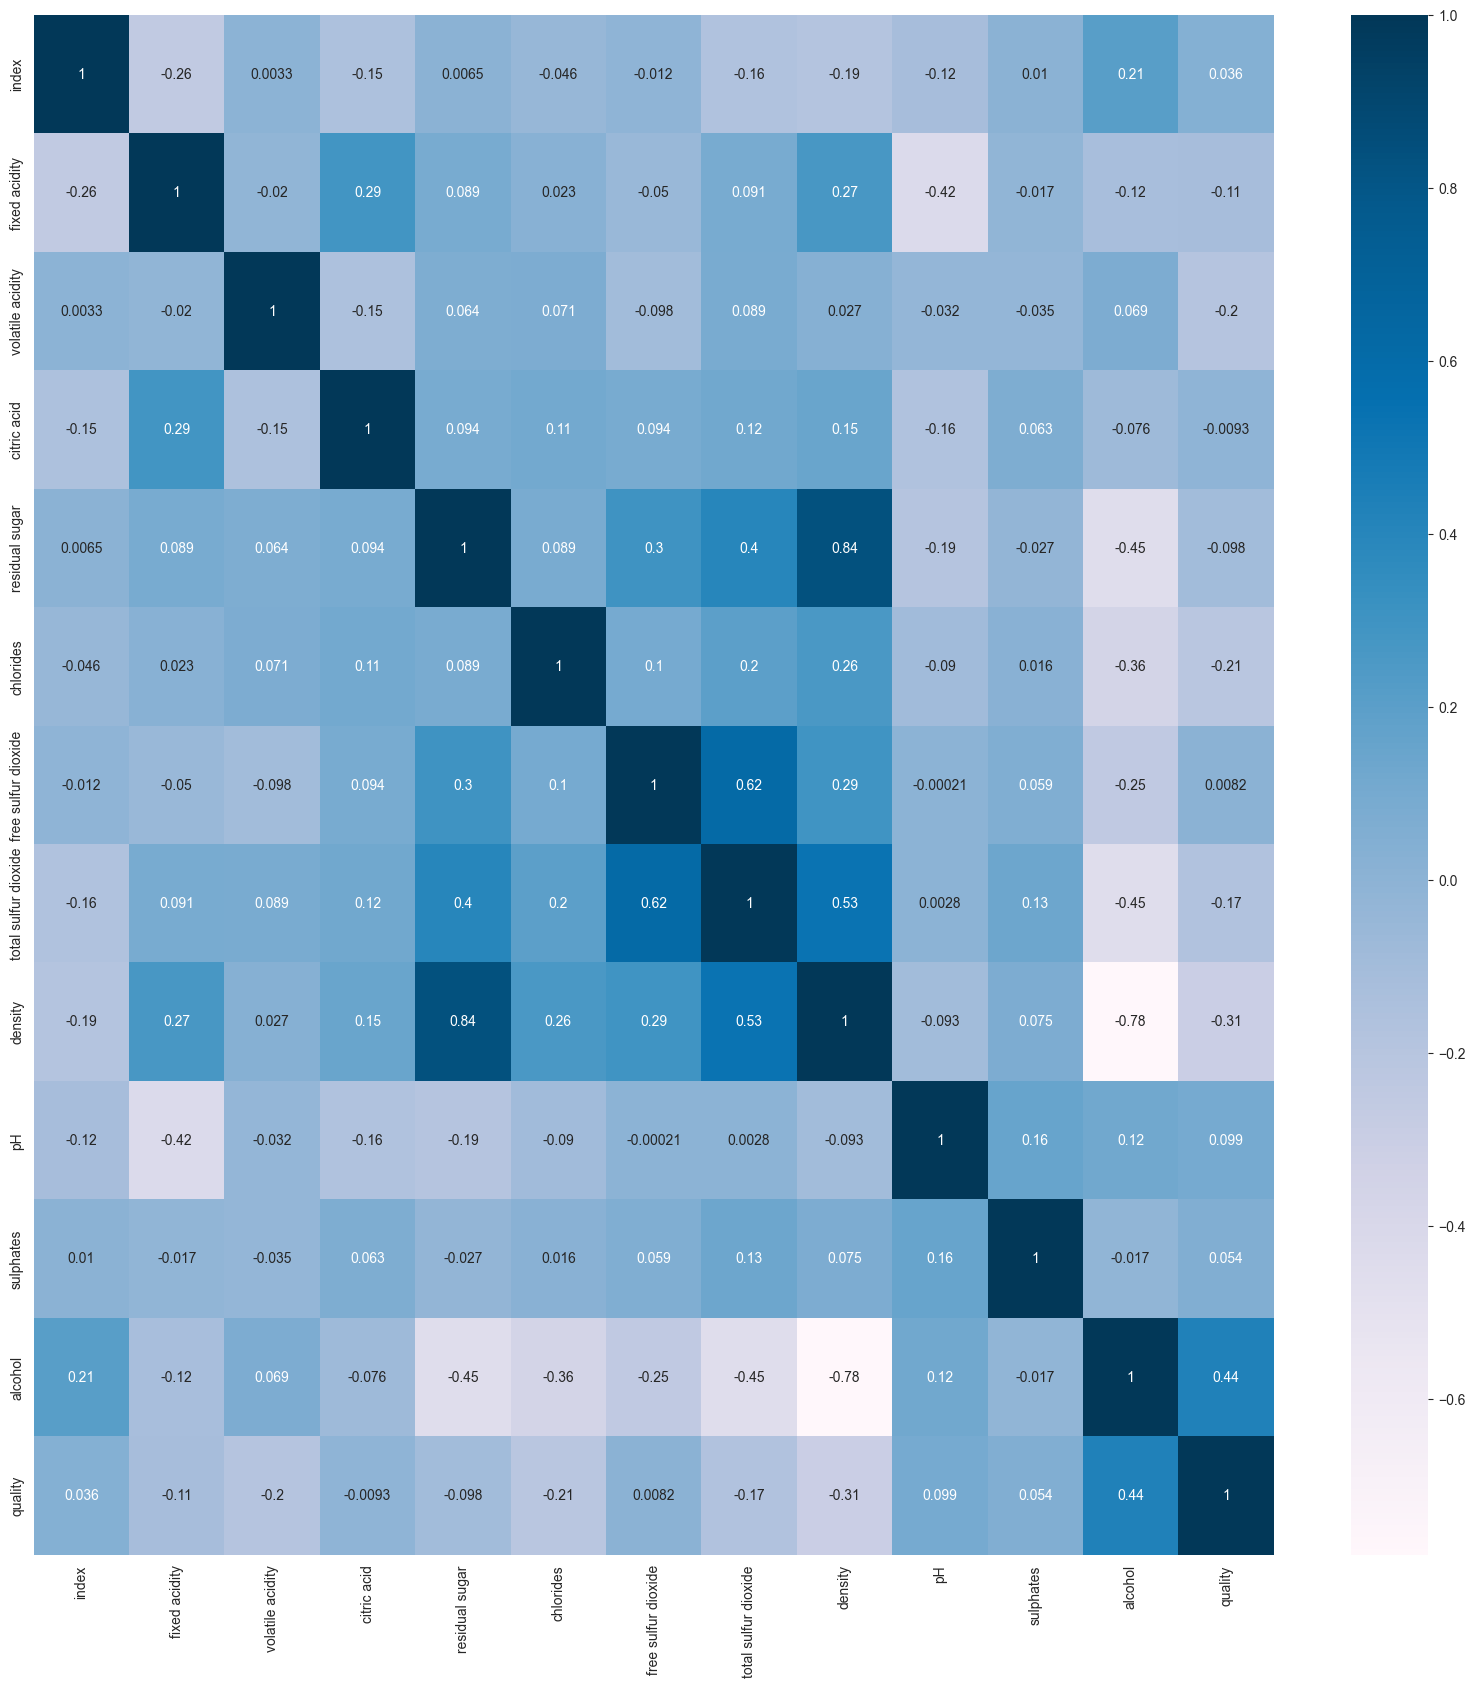

In [255]:
#  correlation matrix heatmap
corrmat = white.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sn.heatmap(corrmat, annot=True, cmap="PuBu")
plt.show()

# preprocessing - red

In [256]:
# Separate red wine data

red = data[data['type']=='red']
red = red.drop('type', axis=1)
red = red.reset_index()
print(red.isna().sum())

# Use columns without any missing values to predict missing values
non_nan_columns = red.loc[:, red.isna().sum() == 0].columns # Columns without any missing values
nan_columns = red.loc[:, red.isna().sum() != 0].columns # Columns with missing values

drop_red = red.dropna()  # Clean data without missing values
drop_red_X = drop_red[non_nan_columns] 
for col in nan_columns: # For each column with missing values
    drop_red_y = drop_red[col] # Set the column as the target variable
    model = LinearRegression()
    model.fit(drop_red_X, drop_red_y)
    
    nan_idx = red.loc[red[col].isnull(), col].index
    print(nan_idx)
    red.loc[red[col].isnull(), col]= model.predict(red[non_nan_columns].iloc[nan_idx, :])# Fill missing values

print(red.isna().sum())

red_X = red.drop('quality', axis=1)
red_y = red['quality']

# Scale the features
for col in red_X.columns:
    red_X[col] = StandardScaler().fit_transform(red_X[[col]])

# Split the data into training and testing sets
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_X,red_y,
                                                    test_size = 0.2,
                                                    random_state=1,
                                                    stratify=red_y) # Maintain class distribution

index                   0
fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
quality                 0
dtype: int64
Index([1530, 1531], dtype='int64')
Index([1588], dtype='int64')
Index([1422], dtype='int64')
Index([1530, 1531], dtype='int64')
Index([1423, 1595], dtype='int64')
index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


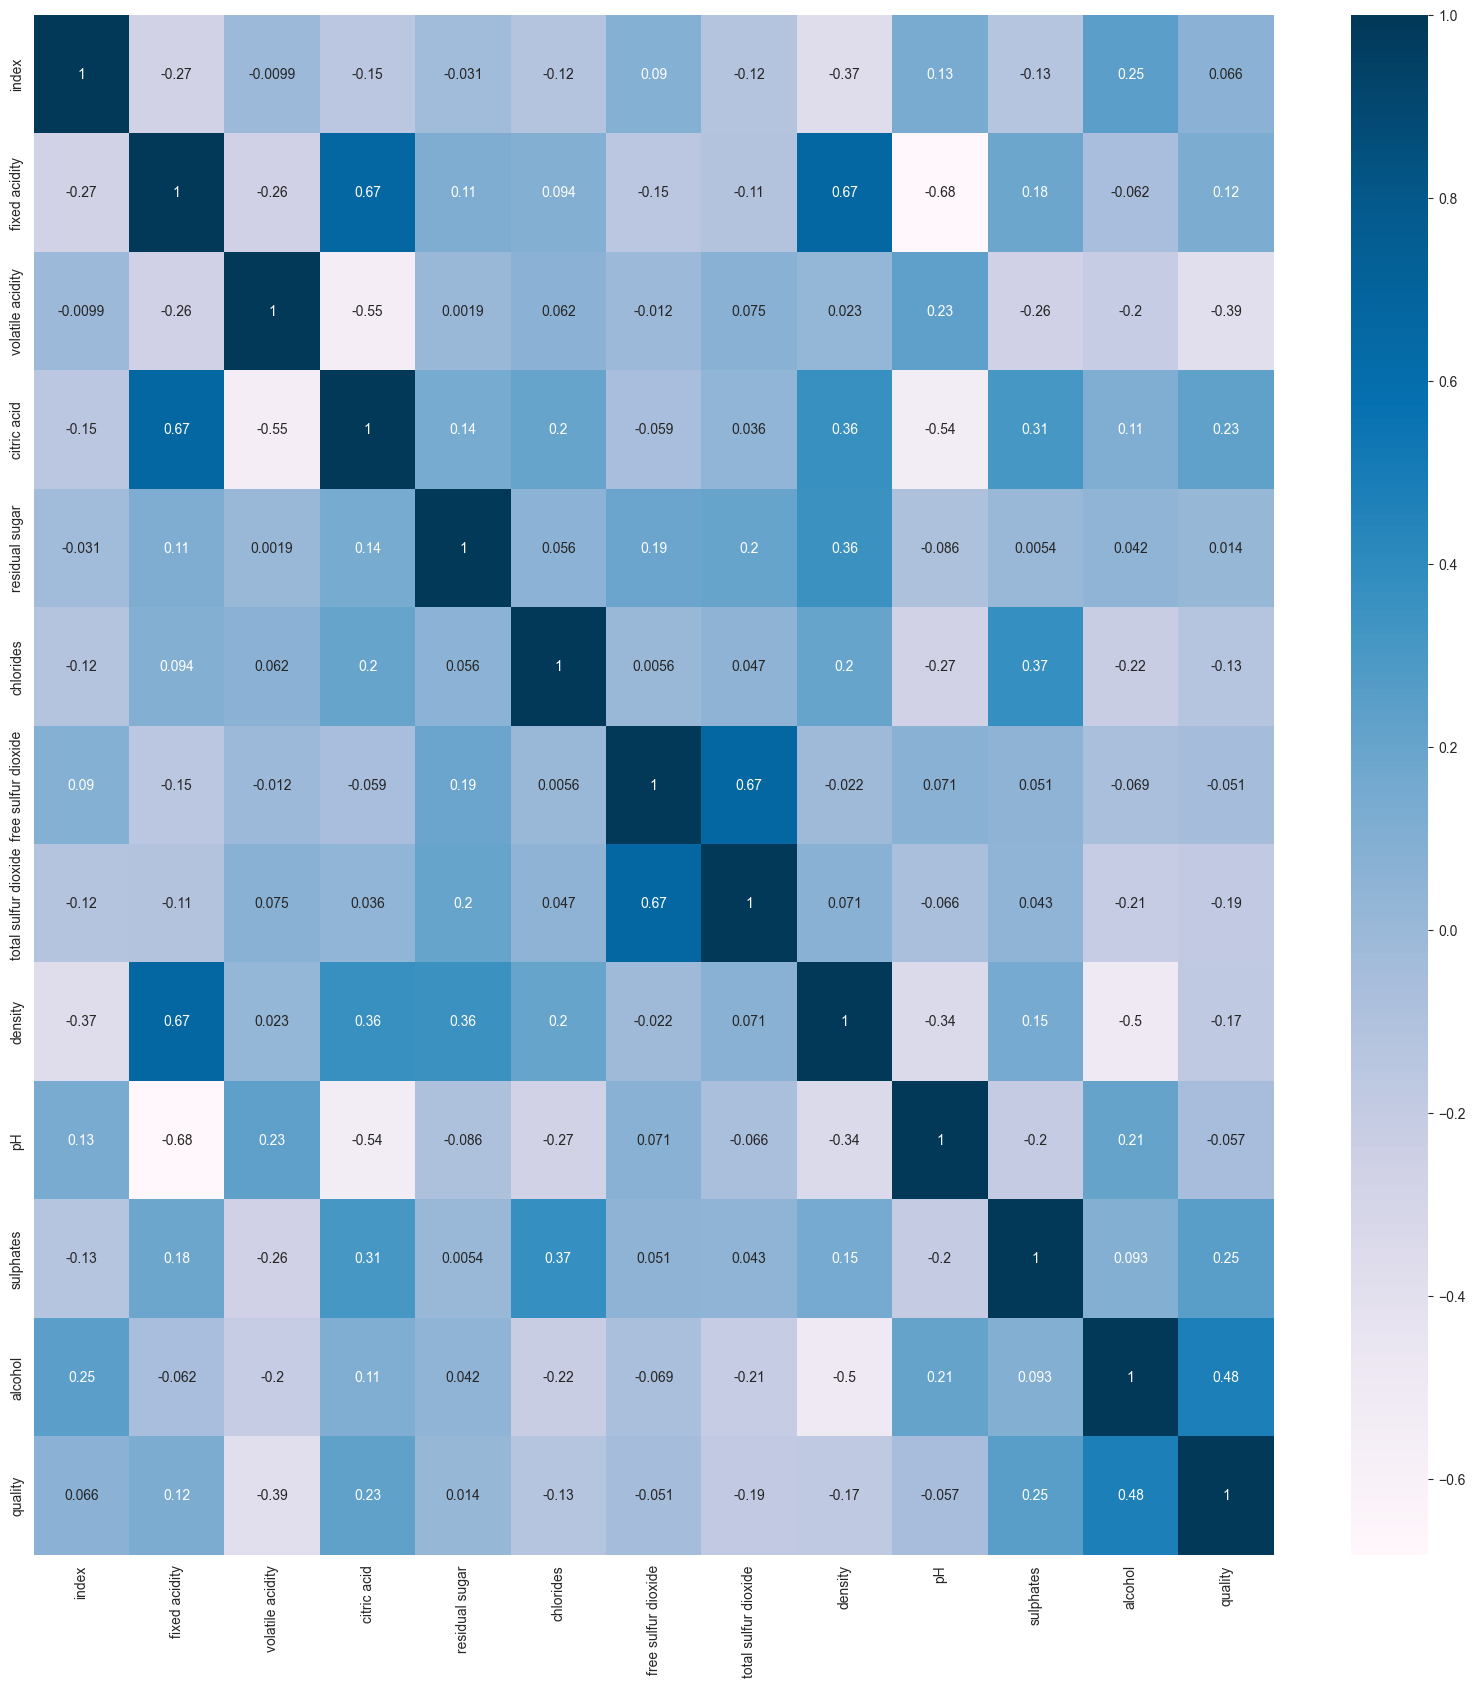

In [257]:
#  correlation matrix heatmap
corrmat = red.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sn.heatmap(corrmat, annot=True, cmap="PuBu")
plt.show()

# white wine quality prediction

# LinearRegression

In [258]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

# Select features with correlation values greater than |0.2|
new_X_train = pd.DataFrame({'alcohol':white_X_train['alcohol'],
                            'density':white_X_train['density'],
                            'volatile acidity':white_X_train['volatile acidity'],
                            'chlorides':white_X_train['chlorides']})
new_X_test = pd.DataFrame({'alcohol':white_X_test['alcohol'],
                            'density':white_X_test['density'],
                            'volatile acidity':white_X_test['volatile acidity'],
                            'chlorides':white_X_test['chlorides']})
# Train the Linear Regression model
model = LinearRegression()
model.fit(new_X_train, white_y_train)
# Predict using the model
y_predict = model.predict(new_X_test)

# evaluation
print("r2 : {}".format(r2_score(white_y_test, y_predict)))
print("MAE : {}".format(mean_absolute_error(white_y_test, y_predict)))
print("MSE : {}".format(mean_squared_error(white_y_test, y_predict)))
print("MAPE : {}".format(mean_absolute_percentage_error(white_y_test, y_predict)))

r2 : 0.2858857654053131
MAE : 0.586890985292243
MSE : 0.5605841355118976
MAPE : 0.10354752382350889


# LogisticRegression

0.5540816326530612
Predicted  3  4    5    6   7
Actual                       
3          1  0    3    0   0
4          0  2   23    8   0
5          1  0  164  125   1
6          0  0   88  326  26
7          0  0    6  120  50
8          0  0    3   16  16
9          0  0    0    0   1


C:\Users\HyeonjiKim\Documents\GitHub\3-1\dataScience\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='Predicted', ylabel='Actual'>

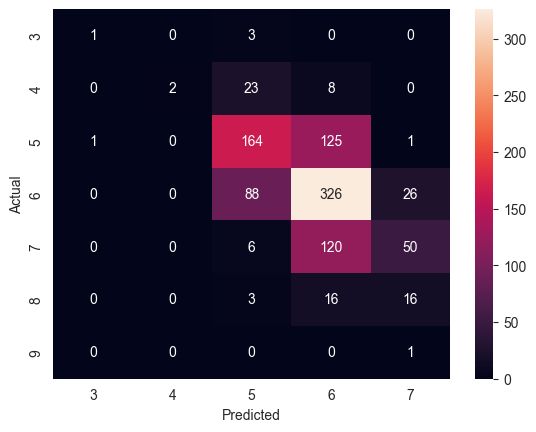

In [259]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(white_X_train, white_y_train)

# Predict using the model
y_predict = model.predict(white_X_test)
# evaluation
print(model.score(white_X_test, white_y_test))

# confusion_matrix
df = pd.DataFrame({'y_predicted': y_predict,
                   'y_actual':white_y_test})
confusion_matrix = pd.crosstab(df['y_actual'], 
df['y_predicted'], rownames=['Actual'], 
colnames=['Predicted'])
print(confusion_matrix)

# Confusion matrix visualization
sn.heatmap(confusion_matrix, annot=True, fmt='.0f')

# DecisionTree

In [260]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the Decision Tree Classifier model
model = DecisionTreeClassifier()
model.fit(white_X_train, white_y_train)

# Predict using the model
y_pred = model.predict(white_X_test)

# evaluation
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
precision = precision_score(white_y_test, y_pred, average='macro')
recall = recall_score(white_y_test, y_pred, average='macro')
f1 = f1_score(white_y_test, y_pred, average='macro')

# print evaluation
print("\nmacro")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Evaluation
# 'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
precision = precision_score(white_y_test, y_pred, average='weighted')
recall = recall_score(white_y_test, y_pred, average='weighted')
f1 = f1_score(white_y_test, y_pred, average='weighted')

# print evaluation
print("\nweighted")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


macro
Precision: 0.3635574762055599
Recall: 0.35854555974217245
F1-score: 0.36016806996548506

weighted
Precision: 0.6128112896726635
Recall: 0.6153061224489796
F1-score: 0.6137356127280862


# KNN

0.5755102040816327
Predicted  4    5    6   7  8
Actual                       
3          0    3    1   0  0
4          4   24    4   1  0
5          3  203   77   8  0
6          1  117  285  35  2
7          0    7   93  72  4
8          0    1   13  21  0
9          0    0    0   1  0


<Axes: xlabel='Predicted', ylabel='Actual'>

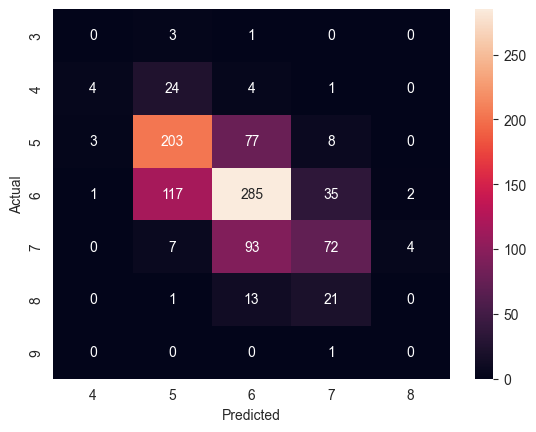

In [261]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(white_X_train,white_y_train)

# Predict using the model
y_predict = knn.predict(white_X_test)

#evaluation
print(knn.score(white_X_test, white_y_test))

# confusion_matrix
df = pd.DataFrame({'y_predicted': y_predict,
                   'y_actual':white_y_test})
confusion_matrix = pd.crosstab(df['y_actual'], 
df['y_predicted'], rownames=['Actual'], 
colnames=['Predicted'])
print(confusion_matrix)

# confusion_matrix visualization
sn.heatmap(confusion_matrix, annot=True, fmt='.0f')

# RandomForest

0.713265306122449
Predicted  4    5    6    7   8
Actual                         
3          0    2    2    0   0
4          6   16   11    0   0
5          1  221   68    1   0
6          0   62  355   23   0
7          0    2   67  105   2
8          0    0   11   12  12
9          0    0    1    0   0


<Axes: xlabel='Predicted', ylabel='Actual'>

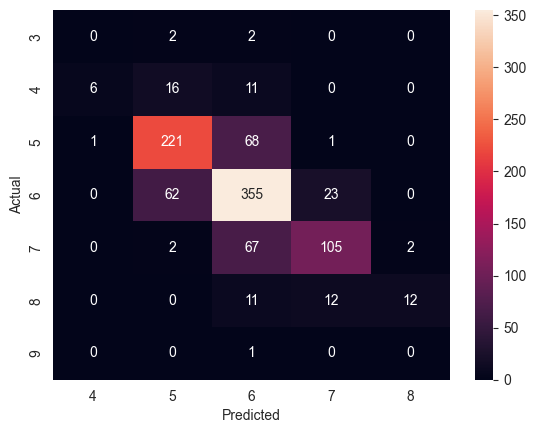

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Random Forest Classifier model
model = RandomForestClassifier()
model.fit(white_X_train,white_y_train)

# Predict using the model
y_predict=model.predict(white_X_test)

# evaluation
print(accuracy_score(white_y_test,y_predict))


# confusion_matrix
df = pd.DataFrame({'y_predicted': y_predict,
                   'y_actual': white_y_test})
confusion_matrix = pd.crosstab(df['y_actual'],
                               df['y_predicted'], rownames=['Actual'],
                               colnames=['Predicted'])
print(confusion_matrix)
# confusion_matrix visualization
sn.heatmap(confusion_matrix, annot=True, fmt='.0f')

# red wine quality prediction

# LinearRegression

In [263]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Select features with correlation values greater than |0.2|
new_X_train = pd.DataFrame({'volatile acidity':red_X_train['volatile acidity'],
                            'citric acid':red_X_train['citric acid'],
                            'sulphates':red_X_train['sulphates'],
                            'alcohol':red_X_train['alcohol']})
new_X_test = pd.DataFrame({'volatile acidity':red_X_test['volatile acidity'],
                            'citric acid':red_X_test['citric acid'],
                           'sulphates':red_X_test['sulphates'],
                           'alcohol':red_X_test['alcohol']})
# Train the Linear Regression model
model = LinearRegression()
model.fit(new_X_train, red_y_train)

# Predict using the model
y_predict = model.predict(new_X_test)

# evaluation
print("r2 : {}".format(r2_score(red_y_test, y_predict)))
print("MAE : {}".format(mean_absolute_error(red_y_test, y_predict)))
print("MSE : {}".format(mean_squared_error(red_y_test, y_predict)))
print("MAPE : {}".format(mean_absolute_percentage_error(red_y_test, y_predict)))



r2 : 0.36382877079260634
MAE : 0.5126651806066618
MSE : 0.4105043959092553
MAPE : 0.09379377256249875


# LogisticRegression

0.584375
Predicted  3   5   6   7
Actual                  
3          1   1   0   0
4          0   7   4   0
5          0  97  39   0
6          0  40  79   9
7          0   1  29  10
8          0   0   1   2


<Axes: xlabel='Predicted', ylabel='Actual'>

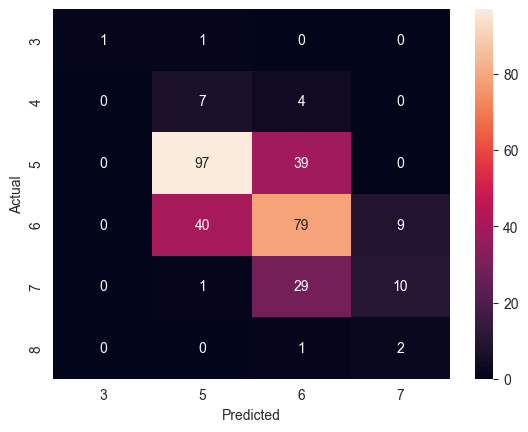

In [264]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(red_X_train, red_y_train)

# Predict using the model
y_predict = model.predict(red_X_test)

#evaluation
print(model.score(red_X_test, red_y_test))

# confusion_matrix
df = pd.DataFrame({'y_predicted': y_predict,
                   'y_actual': red_y_test})
confusion_matrix = pd.crosstab(df['y_actual'],
                               df['y_predicted'], rownames=['Actual'],
                               colnames=['Predicted'])
print(confusion_matrix)
# confusion_matrix visualization
sn.heatmap(confusion_matrix, annot=True, fmt='.0f')

# DecisionTree

In [265]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the Decision Tree Classifier model
model = DecisionTreeClassifier()
model.fit(red_X_train, red_y_train)

# Predict using the model
y_pred = model.predict(red_X_test)


# evaluation
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
precision = precision_score(red_y_test, y_pred, average='macro')
recall = recall_score(red_y_test, y_pred, average='macro')
f1 = f1_score(red_y_test, y_pred, average='macro')

# print evaluation
print("\nmacro")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# evaluation
# 'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
precision = precision_score(red_y_test, y_pred, average='weighted')
recall = recall_score(red_y_test, y_pred, average='weighted')
f1 = f1_score(red_y_test, y_pred, average='weighted')

# print evaluation
print("\nweighted")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



macro
Precision: 0.35600479640607324
Recall: 0.367733864379085
F1-score: 0.36168277074599753

weighted
Precision: 0.6011525624461671
Recall: 0.61875
F1-score: 0.6096942427504696


C:\Users\HyeonjiKim\Documents\GitHub\3-1\dataScience\pythonProject\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HyeonjiKim\Documents\GitHub\3-1\dataScience\pythonProject\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# KNN

0.584375
Predicted   5   6   7
Actual               
3           2   0   0
4           8   3   0
5          98  36   2
6          45  77   6
7           3  25  12
8           0   1   2


<Axes: xlabel='Predicted', ylabel='Actual'>

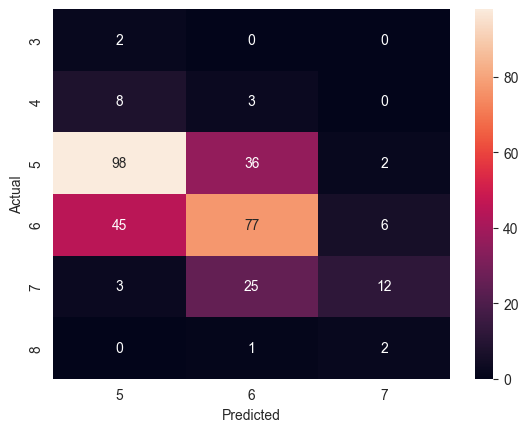

In [266]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(red_X_train, red_y_train)

# Predict using the model
y_predict = knn.predict(red_X_test)

# evaluation
print(knn.score(red_X_test, red_y_test))

# confusion_matrix
df = pd.DataFrame({'y_predicted': y_predict,
                   'y_actual': red_y_test})
confusion_matrix = pd.crosstab(df['y_actual'],
                               df['y_predicted'], rownames=['Actual'],
                               colnames=['Predicted'])
print(confusion_matrix)
# confusion_matrix visualization
sn.heatmap(confusion_matrix, annot=True, fmt='.0f')

# RandomForest

0.696875
Predicted    5   6   7
Actual                
3            2   0   0
4            6   5   0
5          106  30   0
6           24  99   5
7            1  21  18
8            0   2   1


<Axes: xlabel='Predicted', ylabel='Actual'>

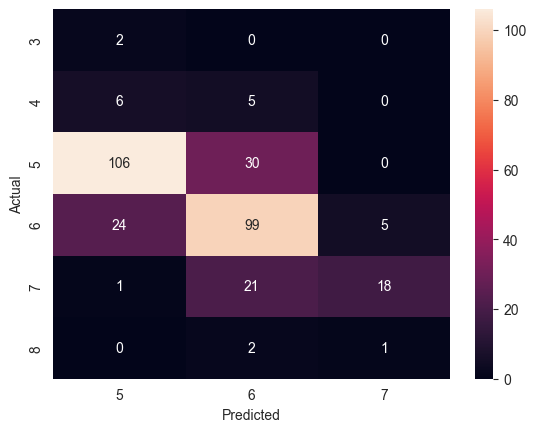

In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Random Forest Classifier model
model = RandomForestClassifier()
model.fit(red_X_train,red_y_train)

# Predict using the model
y_predict=model.predict(red_X_test)

# evaluation
print(accuracy_score(red_y_test,y_predict))

# confusion_matrix
df = pd.DataFrame({'y_predicted': y_predict,
                   'y_actual': red_y_test})
confusion_matrix = pd.crosstab(df['y_actual'],
                               df['y_predicted'], rownames=['Actual'],
                               colnames=['Predicted'])
print(confusion_matrix)
# confusion_matrix visualization
sn.heatmap(confusion_matrix, annot=True, fmt='.0f')